# Energy Consumption Forecast

- In this notebook, we will make **one-step** and **multi-step** forecast of electric consumption.  
- The dataset consists of **three years of hourly electricity load and temperature** records.  
- To make these predictions, we will use several kinds of **statistical**, **machine learning** and **deep learning** models. Then, we will compare their performances and select the best one. 

## Explaratory Data Analysis
First, we will describe and visualize the dataset.  

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_excel('energy_demand.xlsx', sheet_name='energy_demand')
df

,Date,Hour,load,T
0,2012-01-01,0,2872.0,30.666667
1,2012-01-01,1,2698.0,32.000000
2,2012-01-01,2,2558.0,32.666667
3,2012-01-01,3,2444.0,30.000000
4,2012-01-01,4,2402.0,31.000000
...,...,...,...,...
26300,2014-12-31,20,4012.0,18.000000
26301,2014-12-31,21,3856.0,16.666667
26302,2014-12-31,22,3671.0,17.000000
26303,2014-12-31,23,3499.0,15.333333


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26305 entries, 0 to 26304
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    26305 non-null  datetime64[ns]
 1   Hour    26305 non-null  int64         
 2   load    26305 non-null  float64       
 3   T       26305 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 822.2 KB


There are no missing values.  
We can rename the 'load' column to 'Load', so that the naming convention is the same of all columns and that we won't have to specify a custom label 'Load' in our graphs (for them to look good).

In [3]:
df.rename(columns={'load': 'Load'}, inplace=True)

We will set a partial index of Date + Hour and then visualize the data in a lineplot chronologically.

In [4]:
df = df.set_index(['Date', 'Hour'])
df.index

MultiIndex([('2012-01-01',  0),
            ('2012-01-01',  1),
            ('2012-01-01',  2),
            ('2012-01-01',  3),
            ('2012-01-01',  4),
            ('2012-01-01',  5),
            ('2012-01-01',  6),
            ('2012-01-01',  7),
            ('2012-01-01',  8),
            ('2012-01-01',  9),
            ...
            ('2014-12-31', 15),
            ('2014-12-31', 16),
            ('2014-12-31', 17),
            ('2014-12-31', 18),
            ('2014-12-31', 19),
            ('2014-12-31', 20),
            ('2014-12-31', 21),
            ('2014-12-31', 22),
            ('2014-12-31', 23),
            ('2014-12-31', 24)],
           names=['Date', 'Hour'], length=26305)

In [5]:
df[10:40]

Load          T
Date       Hour                   
2012-01-01 10    3105.0  33.333333
           11    3174.0  36.666667
           12    3180.0  40.333333
           13    3184.0  43.666667
           14    3147.0  43.333333
           15    3122.0  45.000000
           16    3137.0  44.666667
           17    3486.0  43.333333
           18    3717.0  41.666667
           19    3659.0  41.333333
           20    3513.0  41.666667
           21    3344.0  42.666667
           22    3129.0  43.333333
           23    2873.0  44.333333
           24    2639.0  44.000000
2012-01-02 1     2458.0  43.666667
           2     2354.0  43.000000
           3     2294.0  42.666667
           4     2288.0  43.666667
           5     2353.0  43.000000
           6     2503.0  41.000000
           7     2737.0  40.000000
           8     2960.0  37.333333
           9     3185.0  37.000000
           10    3390.0  37.333333
           11    3510.0  38.666667
           12    3549.0  40.000000
           13    3517.0  38.000000
           14    3469.0  39.333333
           15    3449.0  38.333333

In [6]:
df.loc[('2013-02-08', 7)]  # to showcase how to access a specific row using multi-index

Load    3701.000000
T         12.666667
Name: (2013-02-08 00:00:00, 7), dtype: float64

For visualization purposes, we can define new columns **Year, Month, Day**.

In [7]:
df['Year'] = df.index.get_level_values(0).year
df['Month'] = df.index.get_level_values(0).month
df['Day'] = df.index.get_level_values(0).day

Let's see how the **Energy Demand varies each hour**. We will also differentiate the lineplots by year, resulting in 3 lineplots, which we can compare and conclude if the Energy Demand varies year by year.

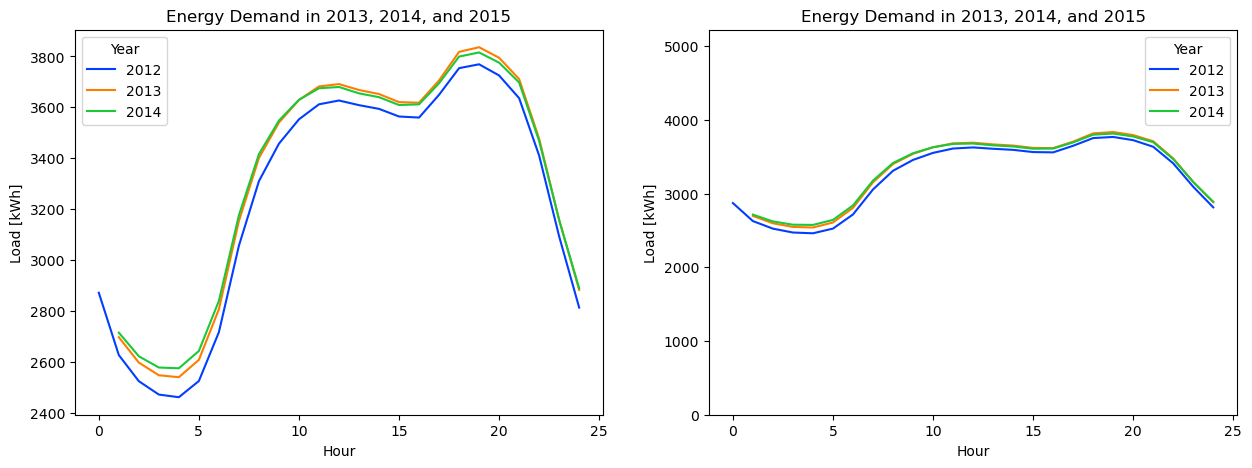

In [8]:
_, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.lineplot(data=df, x='Hour', y='Load', hue='Year', errorbar=None, palette='bright', legend='full', ax=axes[0])\
    .set(title='Energy Demand in 2013, 2014, and 2015', ylabel='Load [kWh]');

sns.lineplot(data=df, x='Hour', y='Load', hue='Year', errorbar=None, palette='bright', legend='full', ax=axes[1])\
    .set(title='Energy Demand in 2013, 2014, and 2015', ylabel='Load [kWh]', ylim=(0, df['Load'].max()));

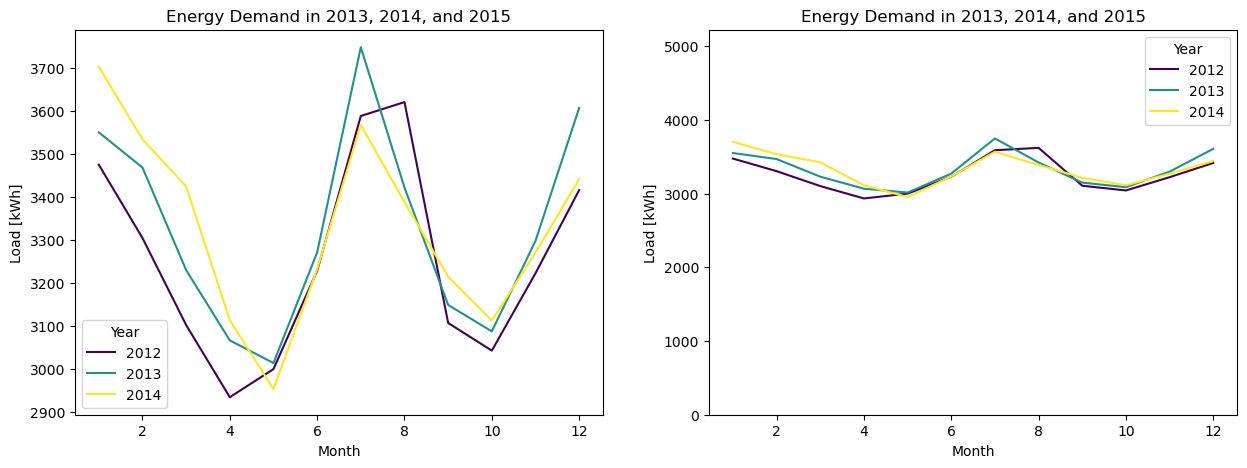

In [9]:
_, axes = plt.subplots(1, 2, figsize=(15, 5))
sns.lineplot(data=df, x='Month', y='Load', hue='Year',errorbar=None, palette='viridis', ax=axes[0])\
    .set(title='Energy Demand in 2013, 2014, and 2015', ylabel='Load [kWh]');
sns.lineplot(data=df, x='Month', y='Load', hue='Year',errorbar=None, palette='viridis', ax=axes[1])\
    .set(title='Energy Demand in 2013, 2014, and 2015', ylabel='Load [kWh]', ylim=(0, df['Load'].max()));

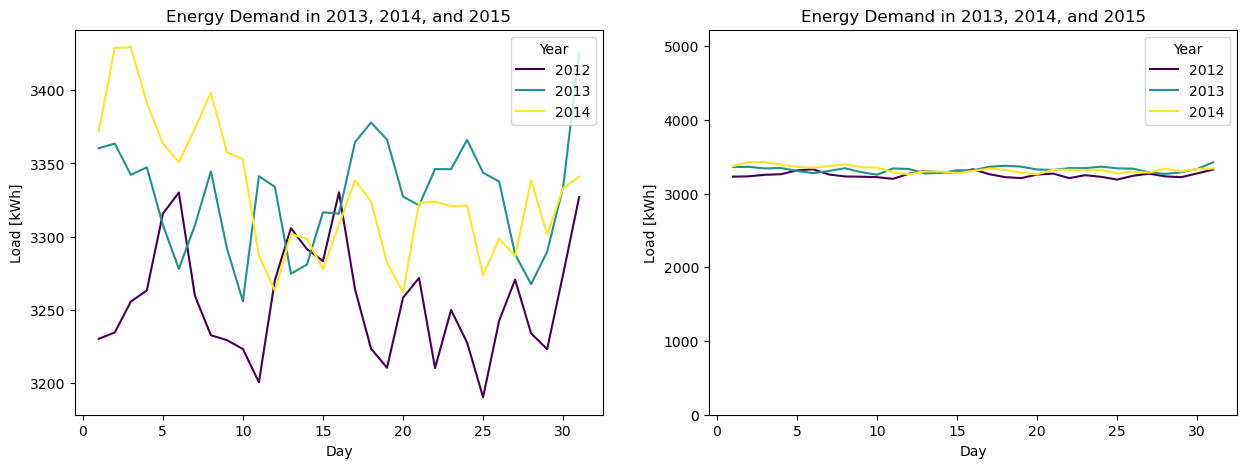

In [10]:
_, axes = plt.subplots(1, 2, figsize=(15, 5))
sns.lineplot(data=df, x='Day', y='Load', hue='Year', errorbar=None, palette='viridis', ax=axes[0])\
    .set(title='Energy Demand in 2013, 2014, and 2015', ylabel='Load [kWh]');
sns.lineplot(data=df, x='Day', y='Load', hue='Year', errorbar=None, palette='viridis', ax=axes[1])\
    .set(title='Energy Demand in 2013, 2014, and 2015', ylabel='Load [kWh]', ylim=(0, df['Load'].max()));

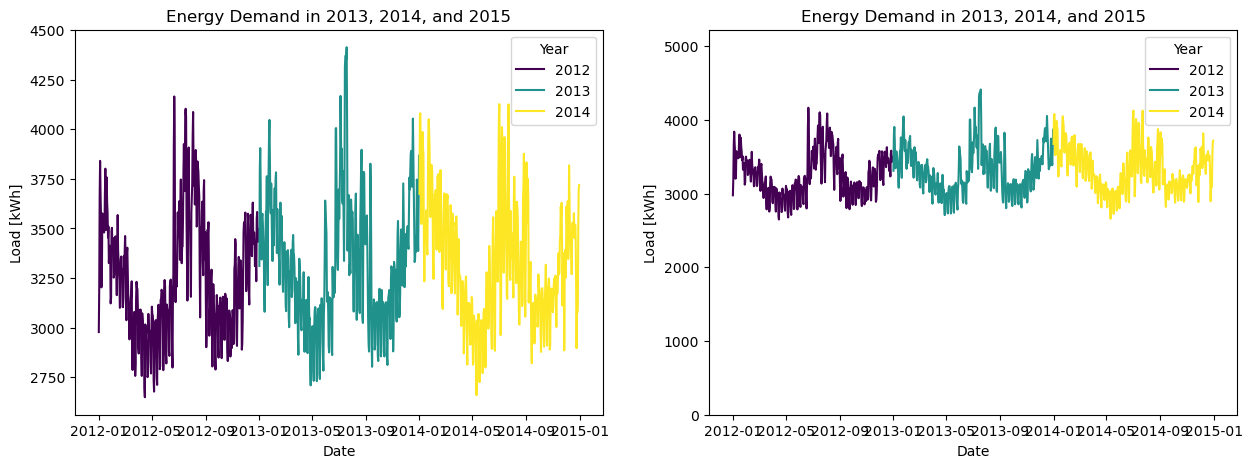

In [11]:
_, axes = plt.subplots(1, 2, figsize=(15, 5))
sns.lineplot(data=df, x='Date', y='Load', hue='Year', errorbar=None, palette='viridis', ax=axes[0])\
    .set(title='Energy Demand in 2013, 2014, and 2015', ylabel='Load [kWh]');
sns.lineplot(data=df, x='Date', y='Load', hue='Year', errorbar=None, palette='viridis', ax=axes[1])\
    .set(title='Energy Demand in 2013, 2014, and 2015', ylabel='Load [kWh]', ylim=(0, df['Load'].max()));

Also, from the visualizations, the data looks stationary. We can confirm that as following:

In [12]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df['Load'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -10.406282
p-value: 0.000000


### Summary
- The **p-value is 0**, meaning the data is perfectly stationary. This is in agreement with our common sense.
- **Scale is very important!** In the left sides, it would seem that the differences between hours/months/dates are bigger then they actually are, but that is because **the scale is misleading**. If we set the scale to start at 0 and end above the maximum value, then we get a much more trustworthy result.
- By hour, the energy demand is the **lowest around 4AM** and **highest around 7PM**, which makes a lot of sense; at 4AM, everybody should be sleeping and not consuming energy and at 7PM, most of the household is at home, cooking dinner or using the appliances.
- By month, **highest consumption is winter and summer months**, while during **spring and autumn it's lower**. I would argue this is because during winter months, the household uses heating a lot, while during summer months, they would use the AC.
- During the days of the month, the energy demand stays at the same level.
- The energy demand is **virtually the same in all three years**.

## Data preparation  
# TODO Why do we need to remove the temperature column also? Try to do it without the slide window function, just pass the features into **some** models and compare the results!

To train our model, we first need to prepare our dataset to fit the models' requirements. To do that, we will:
- Define the **sliding window** function, which will create lagged features.
- Drop all the columns that are not neccessary (Day, Month, Year and Temperature)
- Split the data into train and test set. The train set will be first 2 years and the test set the 3rd year.
- Use the sliding windows function to create the lagged feautures, which are used by the model.

# Statistical models


In [13]:
def slideWindow(df, window_in, horizon):
    d = df.values
    X, y = [], []
    idx = df.index[:-window_in]

    for start in range(len(df)-window_in):
        end = start + window_in
        out = end + horizon
        X.append(d[start:end].reshape(-1))
        y.append(d[end:out].ravel())
    
    cols_x = [f'x{i}' for i in range(1, window_in+1)]
    cols_y = [f'y{i}' for i in range(1, horizon+1)]
    df_xs = pd.DataFrame(X, index=idx, columns=cols_x)
    df_y = pd.DataFrame(y, index=idx, columns=cols_y)
    return pd.concat([df_xs, df_y], axis=1).dropna()

In [14]:
df.drop(columns=['Year', 'Month', 'Day', 'T'], inplace=True)

In [15]:
train = df[:'2013-12-31']
test = df['2014-01-01':]

assert len(train) + len(test) == len(df)
assert len(test) == 365 * 24  # 365 days * 24 hours
assert len(train) == 365 * 24 * 2 + 25  # it's 2 year + a leap day (24 hours) + first day of the dataset has 25 hours <0; 24>

In [16]:
WIN_IN, HORIZON = 24*7, 1
train_shifted = slideWindow(train, WIN_IN, HORIZON)
test_shifted = slideWindow(test, WIN_IN, HORIZON)
X_train = train_shifted.iloc[:, :-HORIZON] 
y_train = train_shifted.iloc[:, -HORIZON:] 
X_test = test_shifted.iloc[:, :-HORIZON]
y_test = test_shifted.iloc[:, -HORIZON:]

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((17377, 168), (17377, 1), (8592, 168), (8592, 1))

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

lr = LinearRegression()
regress = lr.fit(X_train, y_train)
y_pred = regress.predict(X_test)

print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print(f'Mean Absolute Percentage Error: {round(mean_absolute_percentage_error(y_test, y_pred), 4) * 100} %')
print('Score:', regress.score(X_test, y_test))

Mean Absolute Error: 21.98463385227154
Mean Squared Error: 884.6014366880465
Mean Absolute Percentage Error: 0.67 %
Score: 0.997013899406795


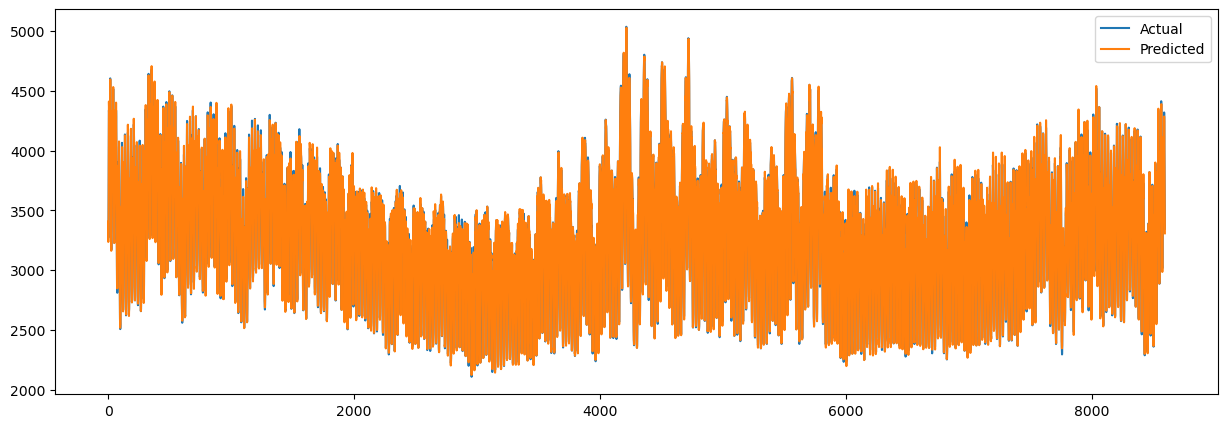

In [18]:
plt.figure(figsize=(15, 5))
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend();

## Machine learning models

__Decision Tree__


Evaluation for Decision Tree:
Mean Absolute Error: 52.90729748603352
Mean Squared Error: 5838.502706005586
Mean Absolute Percentage Error: 1.59 %
R-squared Score: 0.980291286368348


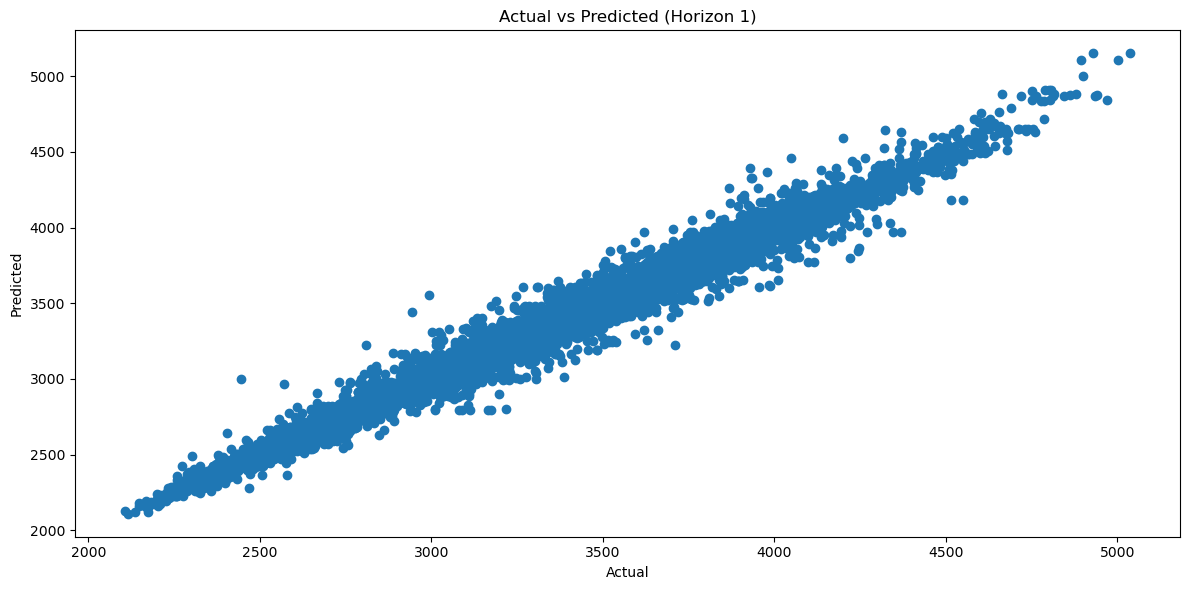

In [21]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

dt_model = DecisionTreeRegressor()
dt_regress = dt_model.fit(X_train, y_train)
dt_pred = dt_regress.predict(X_test)

# Evaluation
print("\nEvaluation for Decision Tree:")
print('Mean Absolute Error:', mean_absolute_error(y_test, dt_pred))
print('Mean Squared Error:', mean_squared_error(y_test, dt_pred))
print(f'Mean Absolute Percentage Error: {round(mean_absolute_percentage_error(y_test, dt_pred), 4) * 100} %')

# R-squared score
dt_score = r2_score(y_test, dt_pred)
print('R-squared Score:', dt_score)

# Visualization of actual vs predicted values for Decision Tree
plt.figure(figsize=(12, 6))

for i in range(len(y_test.columns)):
    plt.subplot(1, len(y_test.columns), i+1)
    plt.scatter(y_test.iloc[:, i], dt_pred)
    plt.title(f'Actual vs Predicted (Horizon {i+1})')  #"horizon" refers to the number of time steps into the future you are trying to predict. In our case, when we are forecasting electric energy consumption, the horizon represents how many hours into the future we want to predict.
    plt.xlabel('Actual')
    plt.ylabel('Predicted')

plt.tight_layout()
plt.show()




__Random forest__

c:\Users\rppin\anaconda3\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)



Evaluation for Random Forest:
Mean Absolute Error: 30.896020716945994
Mean Squared Error: 1917.6311799406424
Mean Absolute Percentage Error: 0.9199999999999999 %
R-squared Score: 0.993526757513069


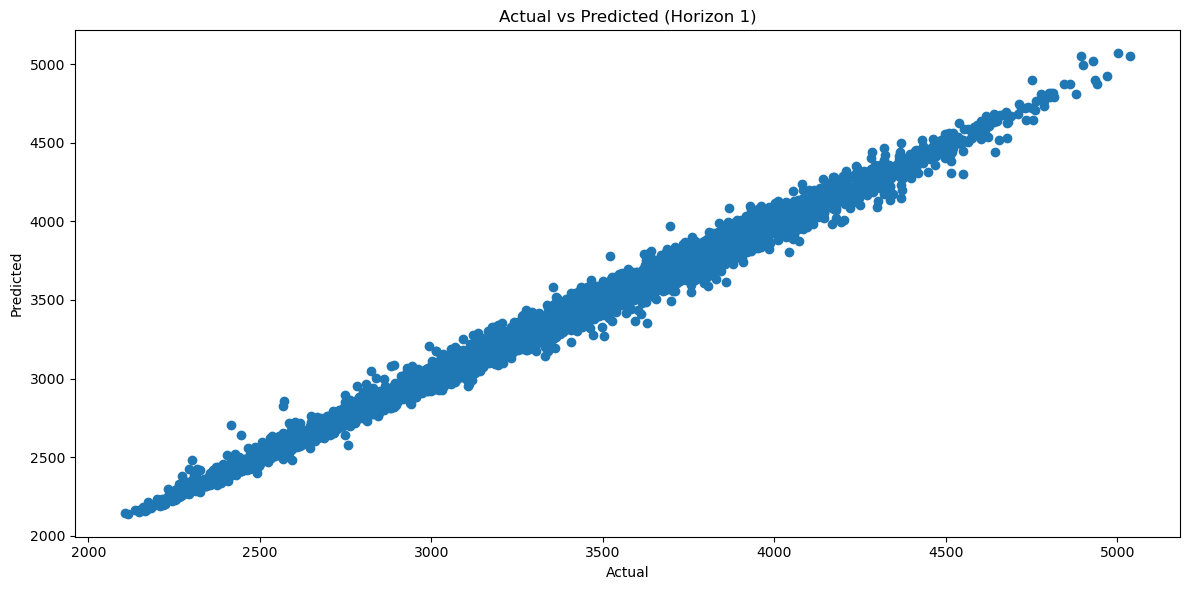

In [25]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest model
rf_model = RandomForestRegressor()
rf_regress = rf_model.fit(X_train, y_train)
rf_pred = rf_regress.predict(X_test)

# Evaluation
print("\nEvaluation for Random Forest:")
print('Mean Absolute Error:', mean_absolute_error(y_test, rf_pred))
print('Mean Squared Error:', mean_squared_error(y_test, rf_pred))
print(f'Mean Absolute Percentage Error: {round(mean_absolute_percentage_error(y_test, rf_pred), 4) * 100} %')

# R-squared score
rf_score = rf_regress.score(X_test, y_test)
print('R-squared Score:', rf_score)

# Reshape rf_pred to a 2D array if needed
rf_pred_2d = rf_pred.reshape(-1, HORIZON)

# Visualization of actual vs predicted values for Random Forest
plt.figure(figsize=(12, 6))

for i in range(len(y_test.columns)):
    plt.subplot(1, len(y_test.columns), i+1)
    plt.scatter(y_test.iloc[:, i], rf_pred_2d[:, i])
    plt.title(f'Actual vs Predicted (Horizon {i+1})')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')

plt.tight_layout()
plt.show()

__Neural Network__

c:\Users\rppin\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1625: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Evaluation for Neural Network:
Mean Absolute Error: 63.06026020063993
Mean Squared Error: 6716.184620960018
Mean Absolute Percentage Error: 1.92 %
R-squared Score: 0.9773285436254656


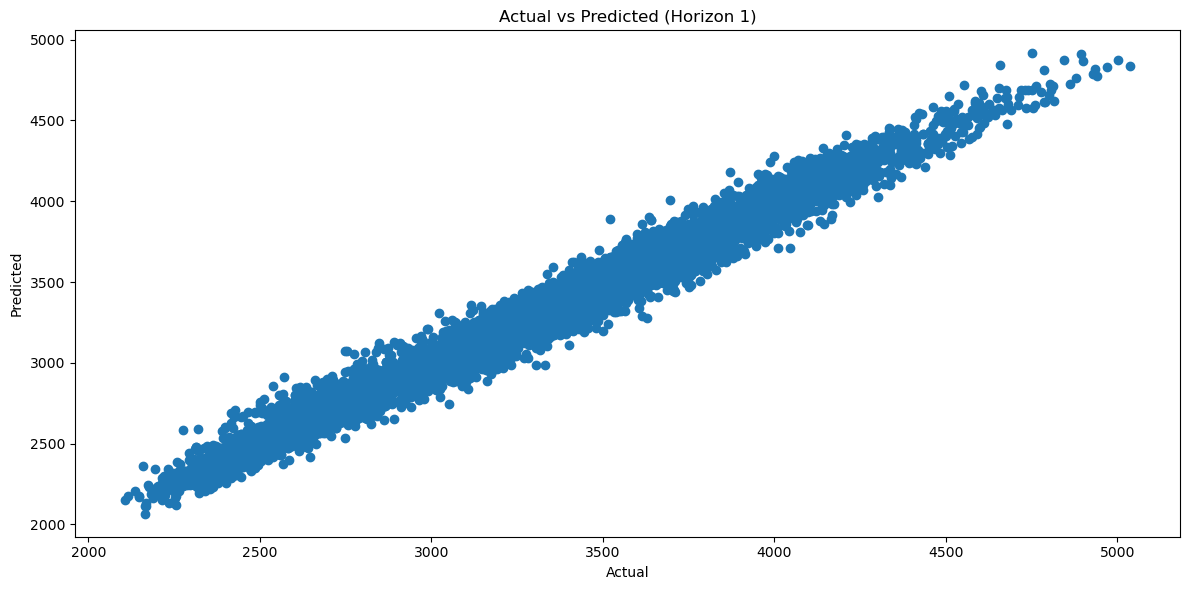

In [26]:
from sklearn.neural_network import MLPRegressor

nn_model = MLPRegressor(max_iter=100)
nn_regress = nn_model.fit(X_train, y_train)
nn_pred = nn_regress.predict(X_test)

# Evaluation
print("\nEvaluation for Neural Network:")
print('Mean Absolute Error:', mean_absolute_error(y_test, nn_pred))
print('Mean Squared Error:', mean_squared_error(y_test, nn_pred))
print(f'Mean Absolute Percentage Error: {round(mean_absolute_percentage_error(y_test, nn_pred), 4) * 100} %')

# R-squared score
nn_score = nn_regress.score(X_test, y_test)
print('R-squared Score:', nn_score)

nn_pred_2d = nn_pred.reshape(-1, HORIZON)

# Visualization of actual vs predicted values for Neural Network
plt.figure(figsize=(12, 6))

for i in range(len(y_test.columns)):
    plt.subplot(1, len(y_test.columns), i+1)
    plt.scatter(y_test.iloc[:, i], nn_pred_2d[:, i])
    plt.title(f'Actual vs Predicted (Horizon {i+1})')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')

plt.tight_layout()
plt.show()


__XGBoost__


Evaluation for XGBoost:
Mean Absolute Error: 34.97243671665866
Mean Squared Error: 2228.600566351436
Mean Absolute Percentage Error: 1.05 %
R-squared Score: 0.9924770351966475


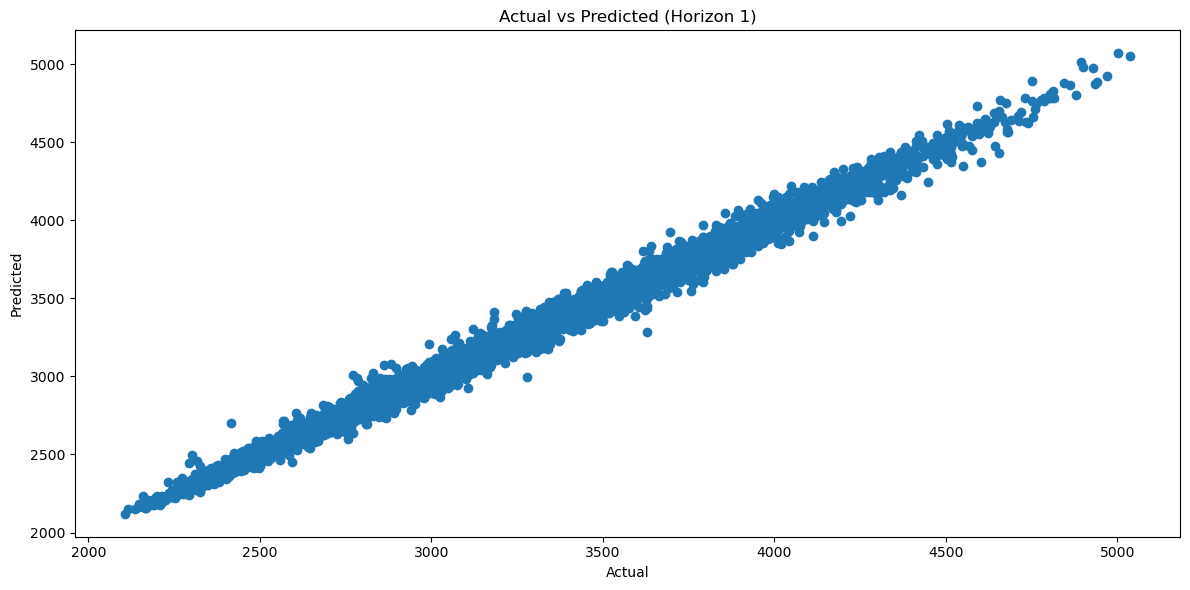

In [27]:
import xgboost as xgb

xgb_model = xgb.XGBRegressor()
xgb_regress = xgb_model.fit(X_train, y_train)
xgb_pred = xgb_regress.predict(X_test)

# Evaluation
print("\nEvaluation for XGBoost:")
print('Mean Absolute Error:', mean_absolute_error(y_test, xgb_pred))
print('Mean Squared Error:', mean_squared_error(y_test, xgb_pred))
print(f'Mean Absolute Percentage Error: {round(mean_absolute_percentage_error(y_test, xgb_pred), 4) * 100} %')

# R-squared score
xgb_score = xgb_regress.score(X_test, y_test)
print('R-squared Score:', xgb_score)

xgb_pred_2d = xgb_pred.reshape(-1, HORIZON)

# Visualization of actual vs predicted values for XGBoost
plt.figure(figsize=(12, 6))

for i in range(len(y_test.columns)):
    plt.subplot(1, len(y_test.columns), i+1)
    plt.scatter(y_test.iloc[:, i], xgb_pred_2d[:, i])
    plt.title(f'Actual vs Predicted (Horizon {i+1})')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')

plt.tight_layout()
plt.show()
